In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,Normalizer,LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import th data 
df=pd.read_csv('adult_with_headers.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Basic analysis

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.size

488415

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
#finding nullvalues

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
#finding duplicates 

In [14]:
df.duplicated().sum()

24

In [15]:
df1=df.drop_duplicates(ignore_index=True)

In [16]:
#boxplot to see outliers in the data

<Axes: >

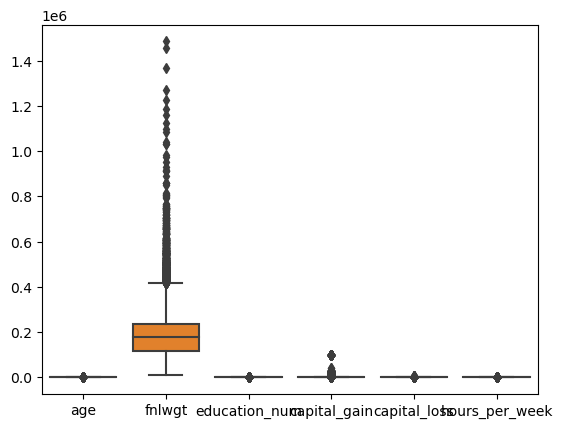

In [17]:
sns.boxplot(df1)

In [18]:
#heatmap to see the coorelation between the pair variables

<Axes: >

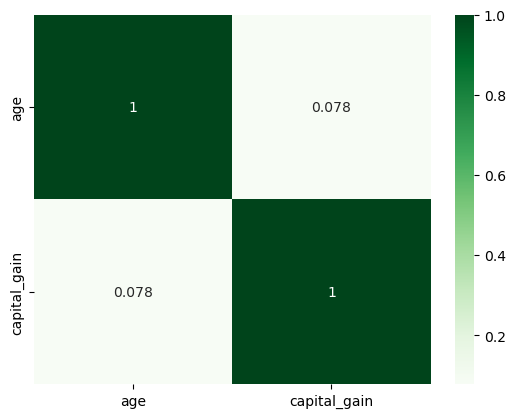

In [19]:
sns.heatmap(df1[['age','capital_gain']].corr(),annot=True,cmap='Greens')

In [20]:
std_scaler=StandardScaler()

In [21]:
df1[['fnlwgt']]=std_scaler.fit_transform(df1[['fnlwgt']])
df1[['capital_gain']]=std_scaler.fit_transform(df1[['capital_gain']])

In [22]:
minmax_scaler=MinMaxScaler()


In [23]:
df1[['education_num']]=minmax_scaler.fit_transform(df1[['education_num']])

In [24]:
df1[['hours_per_week']]=minmax_scaler.fit_transform(df1[['hours_per_week']])

In [25]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,-1.063569,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,0,0.397959,United-States,<=50K
1,50,Self-emp-not-inc,-1.008668,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,0,0.122449,United-States,<=50K
2,38,Private,0.245040,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,0,0.397959,United-States,<=50K
3,53,Private,0.425752,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,0,0.397959,United-States,<=50K
4,28,Private,1.408066,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,0.639678,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145975,0,0.377551,United-States,<=50K
32533,40,Private,-0.335436,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145975,0,0.397959,United-States,>50K
32534,58,Private,-0.358779,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,-0.145975,0,0.397959,United-States,<=50K
32535,22,Private,0.110930,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,-0.145975,0,0.193878,United-States,<=50K


In [26]:
#Standard Scaler makes mean=0,std_dev=1,ranges between[-3,3]
#Minmax scalerranges between [0,1]
#Standard Scaler,Minmax Scaler both are sensitive to outliers
#Robust scaler used for the data having more outliers
#Normalizer used to convert the data v=in vector form

In [27]:
#converting categorical dat into numerical data

In [28]:
df1['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [29]:
df1['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

In [30]:
df1['marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [31]:
df1['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

In [32]:
df1['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [33]:
lab_encoder=LabelEncoder()

In [34]:
df1['workclass']=lab_encoder.fit_transform(df1['workclass'])
df1['education']=lab_encoder.fit_transform(df1['education'])
df1['marital_status']=lab_encoder.fit_transform(df1['marital_status'])
df1['occupation']=lab_encoder.fit_transform(df1['occupation'])
df1['relationship']=lab_encoder.fit_transform(df1['relationship'])

In [35]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,-1.063569,9,0.800000,4,1,1,White,Male,0.148292,0,0.397959,United-States,<=50K
1,50,6,-1.008668,9,0.800000,2,4,0,White,Male,-0.145975,0,0.122449,United-States,<=50K
2,38,4,0.245040,11,0.533333,0,6,1,White,Male,-0.145975,0,0.397959,United-States,<=50K
3,53,4,0.425752,1,0.400000,2,6,0,Black,Male,-0.145975,0,0.397959,United-States,<=50K
4,28,4,1.408066,9,0.800000,2,10,5,Black,Female,-0.145975,0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,0.639678,7,0.733333,2,13,5,White,Female,-0.145975,0,0.377551,United-States,<=50K
32533,40,4,-0.335436,11,0.533333,2,7,0,White,Male,-0.145975,0,0.397959,United-States,>50K
32534,58,4,-0.358779,11,0.533333,6,1,4,White,Female,-0.145975,0,0.397959,United-States,<=50K
32535,22,4,0.110930,11,0.533333,4,1,3,White,Male,-0.145975,0,0.193878,United-States,<=50K


In [36]:
df1['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [37]:
df1['sex'].value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

In [38]:
one_hot=OneHotEncoder()

In [39]:
df2=pd.get_dummies(df1,dtype='int')
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,7,-1.063569,9,0.800000,4,1,1,0.148292,0,...,0,0,0,0,0,1,0,0,1,0
1,50,6,-1.008668,9,0.800000,2,4,0,-0.145975,0,...,0,0,0,0,0,1,0,0,1,0
2,38,4,0.245040,11,0.533333,0,6,1,-0.145975,0,...,0,0,0,0,0,1,0,0,1,0
3,53,4,0.425752,1,0.400000,2,6,0,-0.145975,0,...,0,0,0,0,0,1,0,0,1,0
4,28,4,1.408066,9,0.800000,2,10,5,-0.145975,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,0.639678,7,0.733333,2,13,5,-0.145975,0,...,0,0,0,0,0,1,0,0,1,0
32533,40,4,-0.335436,11,0.533333,2,7,0,-0.145975,0,...,0,0,0,0,0,1,0,0,0,1
32534,58,4,-0.358779,11,0.533333,6,1,4,-0.145975,0,...,0,0,0,0,0,1,0,0,1,0
32535,22,4,0.110930,11,0.533333,4,1,3,-0.145975,0,...,0,0,0,0,0,1,0,0,1,0


In [48]:
#OneHotEncoding used to treat categorical data ,but it can lead to increased dimensionality and overfitting
#Label Encoder used to convert the categorical data into numeric like 0,1
#Label Encoder is best for nominal data,not forordinal data

# Isolation Forest

In [49]:
from sklearn.ensemble import IsolationForest

In [50]:
df2

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K,labels
0,39,7,-1.063569,9,0.800000,4,1,1,0.148292,0,...,0,0,0,0,1,0,0,1,0,1
1,50,6,-1.008668,9,0.800000,2,4,0,-0.145975,0,...,0,0,0,0,1,0,0,1,0,1
2,38,4,0.245040,11,0.533333,0,6,1,-0.145975,0,...,0,0,0,0,1,0,0,1,0,1
3,53,4,0.425752,1,0.400000,2,6,0,-0.145975,0,...,0,0,0,0,1,0,0,1,0,1
4,28,4,1.408066,9,0.800000,2,10,5,-0.145975,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,4,0.639678,7,0.733333,2,13,5,-0.145975,0,...,0,0,0,0,1,0,0,1,0,1
32533,40,4,-0.335436,11,0.533333,2,7,0,-0.145975,0,...,0,0,0,0,1,0,0,0,1,1
32534,58,4,-0.358779,11,0.533333,6,1,4,-0.145975,0,...,0,0,0,0,1,0,0,1,0,1
32535,22,4,0.110930,11,0.533333,4,1,3,-0.145975,0,...,0,0,0,0,1,0,0,1,0,1


In [51]:
#training the model
clf=IsolationForest(random_state=10,contamination=0.0025)
clf.fit(df2)

IsolationForest(contamination=0.0025, random_state=10)

In [52]:
# predictions
y_pred_outliers=clf.predict(df2)

In [53]:
#-1 for outliers and 1 for inliners
labels=pd.Series(y_pred_outliers)

In [54]:
df2['labels']=labels
df2.labels.value_counts()

 1    32455
-1       82
Name: labels, dtype: int64

In [55]:
df2[df2.labels==-1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K,labels
297,39,0,-0.306361,12,0.866667,2,0,5,0.322903,0,...,0,0,0,0,0,0,0,1,0,-1
668,20,0,-0.710861,1,0.400000,3,0,3,-0.145975,1762,...,1,0,0,0,0,0,0,1,0,-1
1281,42,1,-0.292311,7,0.733333,0,10,4,-0.145975,0,...,0,0,0,0,0,0,0,0,1,-1
1391,40,2,0.943795,5,0.200000,2,3,0,-0.145975,1887,...,0,0,0,0,0,0,0,0,1,-1
2330,53,1,-0.158096,15,0.600000,2,4,5,-0.145975,1887,...,0,0,0,0,0,0,0,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31038,30,4,-0.232541,9,0.800000,2,1,5,-0.145975,0,...,0,0,0,0,0,0,0,0,1,-1
31975,52,0,-0.945763,2,0.466667,2,0,5,-0.145975,0,...,0,0,0,0,1,0,0,0,1,-1
32092,29,4,-0.667159,11,0.533333,2,10,5,-0.145975,0,...,0,0,0,0,0,0,0,0,1,-1
32347,53,6,-0.494850,14,0.933333,4,10,1,3.620753,0,...,0,0,0,0,0,0,0,0,1,-1


In [56]:
clf=IsolationForest(random_state=10,contamination=0.025)
clf.fit(df2)
y_pred_outliers=pd.Series(clf.predict(df2))
y_pred_outliers.value_counts()

 1    31723
-1      814
dtype: int64